In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import math

In [3]:
df = pd.read_csv('datasets/laptop_price.csv', encoding = 'latin_1')

In [4]:
df = df.drop(["laptop_ID"], axis='columns')

In [5]:
df.describe(include='all')

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
count,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [6]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

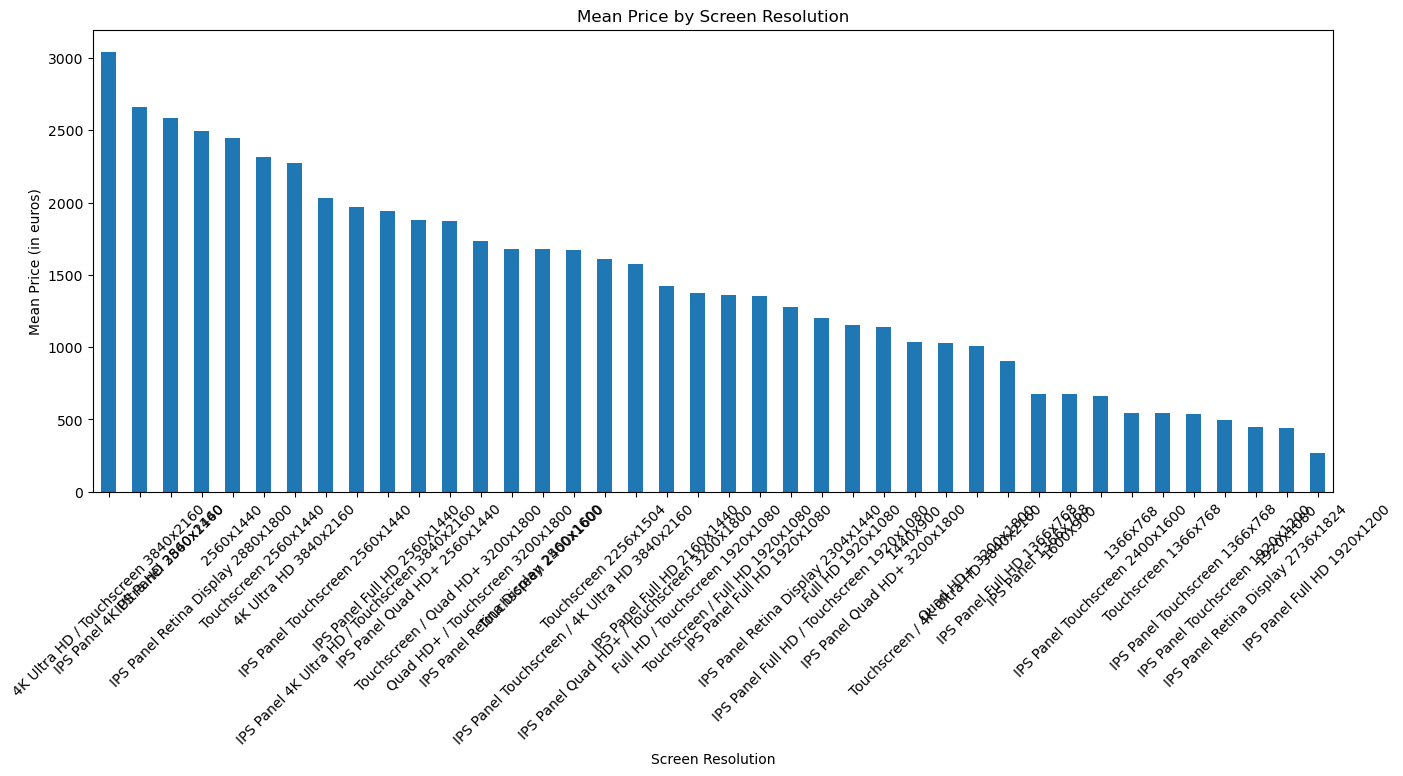

In [7]:
# Group by ScreenResolution and calculate the mean price
mean_prices = df.groupby('ScreenResolution')['Price_in_euros'].mean()

# Sort by mean price in descending order
mean_prices = mean_prices.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(16, 6))
mean_prices.plot(kind='bar')
plt.title('Mean Price by Screen Resolution')
plt.xlabel('Screen Resolution')
plt.ylabel('Mean Price (in euros)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

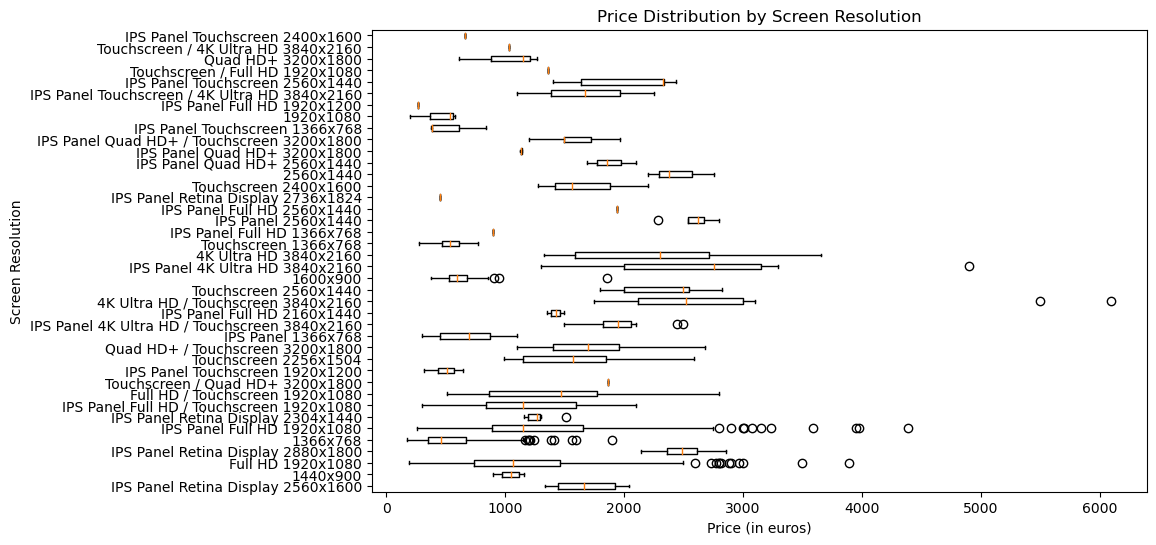

In [8]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['ScreenResolution'] == res]['Price_in_euros'] for res in df['ScreenResolution'].unique()],
            labels=df['ScreenResolution'].unique(), vert=False)
plt.title('Price Distribution by Screen Resolution')
plt.xlabel('Price (in euros)')
plt.ylabel('Screen Resolution')
plt.show()

In [9]:
df = df.rename(columns={'Price_in_euros': 'price'})

In [10]:
df['Weight'] = df['Weight'].apply(lambda x: x.replace('kg',''))
df['Weight'] = df['Weight'].astype(float)

In [11]:
df['Ram'] = df['Ram'].apply(lambda x: x.replace('GB',''))
df['Ram'] = df['Ram'].astype(float)

In [12]:
def memory_type(data):
    memory_types = []  # Initialize an empty list to store memory types
    
    for index, row in data.iterrows():  # Use iterrows() to iterate over rows
        if 'SSD' in row['Memory']:
            memory_types.append('SSD')
        elif 'SSD' in row['Memory'] and 'HDD' in row['Memory']:
            memory_types.append('hybrid')
        elif 'Flash Storage' in row['Memory']:
            memory_types.append('Flash storage')
        elif 'Hybrid' in row['Memory']:
            memory_types.append('hybrid')
        elif 'Hybrid' in row['Memory'] and 'SSD' in row['Memory']:
            memory_types.append('hybrid')
        else:
            memory_types.append('HDD')
    
    # Create a new 'memory_type' column in the DataFrame and assign the values
    data['memory_type'] = memory_types
    
    return data

In [13]:
memory_type(df)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,memory_type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,Flash storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,SSD
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,SSD
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,Flash storage
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,HDD


In [14]:
# It removes the 'GB' string from the 'Memory' column.
df['Memory'] = df['Memory'].str.replace('GB', '')

#It replaces 'TB' with '000' in the 'Memory' column.
df['Memory'] = df['Memory'].str.replace('TB', '000')

#It removes the 'SSD' string from the 'Memory' column.
df['Memory'] = df['Memory'].str.replace('SSD', '')

#It removes the 'HDD' string from the 'Memory' column.
df['Memory'] = df['Memory'].str.replace('HDD', '')

#It removes the 'Flash Storage' string from the 'Memory' column.
df['Memory'] = df['Memory'].str.replace('Flash Storage', '')

#It removes the 'Hybrid' string from the 'Memory' column.
df['Memory'] = df['Memory'].str.replace('Hybrid','')
df['Memory']

0        128 
1        128 
2        256 
3        512 
4        256 
        ...  
1298     128 
1299     512 
1300      64 
1301    1000 
1302     500 
Name: Memory, Length: 1303, dtype: object

In [15]:
#This line converts the 'Memory' column to a string data type and removes any '.0' from the values, using regular expressions.
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory']

0        128 
1        128 
2        256 
3        512 
4        256 
        ...  
1298     128 
1299     512 
1300      64 
1301    1000 
1302     500 
Name: Memory, Length: 1303, dtype: object

In [16]:
#This line splits the 'Memory' column into two parts using the '+' symbol as a separator, 
#creating a new DataFrame 'new' with two columns.
new = df['Memory'].str.split('+', n=1, expand=True)

#assign the new columns to variable col1 and col2 respectively
col1 = new[0]
col2 = new[1]

#fill all empty cells with 0
col2 = col2.fillna('0')
col2

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: 1, Length: 1303, dtype: object

In [17]:
#change the series col1 and col2 to integer series
col1 = col1.astype(int)
col2 = col2.astype(int)
size = col1+col2
df['memory_size'] = size

In [18]:
#Extract Display Resolution and Panel Type
df['Display_Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')[0]
df['Panel_Type'] = df['ScreenResolution'].str.extract(r'(IPS|Touchscreen|Full HD|4K Ultra HD|Quad HD+)')[0]

#One-Hot Encoding for Panel Types
df = pd.get_dummies(df, columns=['Panel_Type'], prefix='Panel')

#Numerical Encoding for Display Resolution
# temp = df['Display_Resolution'].str.split('x', n=1, expand=True).astype(float)
# df['Display_Resolution'] = temp[0]*temp[1]/1000000

In [19]:
# Custom function to calculate PPI
def calculate_ppi(row):
    width, height = map(float, row['Display_Resolution'].split('x'))
    diagonal = float(row['Inches'])
    ppi = math.sqrt((width**2 + height**2) / (diagonal**2))
    return ppi

# Apply the custom function to each row
df['PPI'] = df.apply(calculate_ppi, axis=1)

In [20]:
#first we will extract name of cpu ehich is first 3 words from cpu column and then we will check which processor it is 
def fetch_processor(x):
    cpu_name=" ".join(x.split()[0:3])
    if cpu_name=='Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    elif cpu_name.split()[0]=='Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
    
df['Cpu_brand']=df['Cpu'].apply(lambda x:fetch_processor(x))

In [21]:
df['gpu_brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [22]:
df.corr()['price']

C:\Users\Nunoo Justice Samuel\AppData\Local\Temp\ipykernel_6148\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


Inches               0.068197
Ram                  0.743007
Weight               0.210370
price                1.000000
memory_size          0.160819
Panel_4K Ultra HD    0.263343
Panel_Full HD        0.063322
Panel_IPS            0.252208
Panel_Quad HD        0.082807
Panel_Touchscreen    0.030770
PPI                  0.473487
Name: price, dtype: float64

In [23]:
df.gpu_brand.unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x2e954acc040>,
 'caps': [<matplotlib.lines.Line2D at 0x2e954acd180>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e954acebf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e954acd4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e954acdbd0>],
 'means': []}

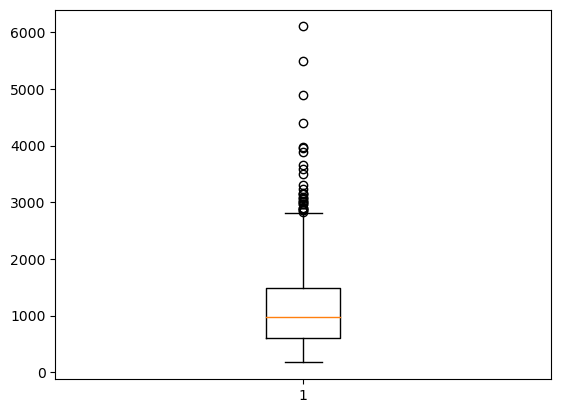

In [24]:
#outlier detection
plt.boxplot(df['price'])

In [25]:
#detecting and removing outliers from price column
q1, q3 = df['price'].quantile([0.25, 0.75])
price_iqr = q3 - q1
lower = q1 - 1.5*price_iqr
upper = q3 + 1.5*price_iqr
upper, lower, q1

(2821.2000000000003, -734.3200000000002, 599.0)

In [26]:
df = df[(df['price'] > lower) & (df['price'] < upper)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2e954a70760>,
 'caps': [<matplotlib.lines.Line2D at 0x2e954a70d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e954a703d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e954a71780>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e954a72050>],
 'means': []}

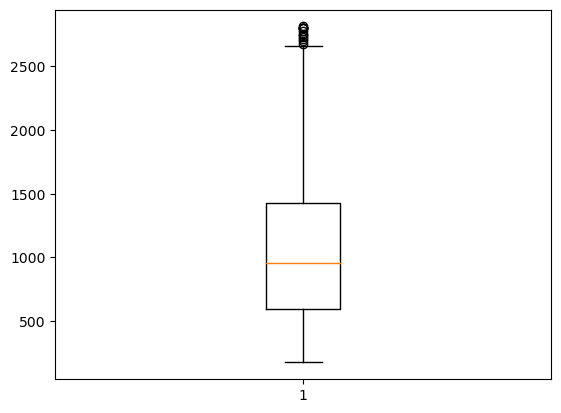

In [27]:
plt.boxplot(df['price'])

In [28]:
#checking the number of other operating systems other than Windows and Mac OS
df[(df['OpSys'] == 'Chrome OS') | (df['OpSys'] == 'Linux') | (df['OpSys'] == 'Android') | (df['OpSys'] == 'No OS')].shape[0]

157

In [29]:
df.OpSys.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [30]:
#i want to reduce the number of columns created when i perform a one-hot encoding on the oysys column so I'm doing some feature engineering
def set_opsys(x):
    if x == 'Windows 10' or x== 'Windows 10 S' or x == 'Windows 7':
        return "Windows"
    elif x == 'macOS' or x == 'Mac OS X':
        return "Mac OS"
    else:
        return 'Other'

df['OpSys'] = df['OpSys'].apply(lambda x:set_opsys(x))

In [31]:
#i want to reduce the number of columns created when i perform a one-hot encoding on the company column so I'm doing some feature engineering
company_stats = df.groupby('Company')['Company'].agg('count').sort_values(ascending=False)

company_less_than_9 = (company_stats[company_stats<=9])

df['Company'] = df['Company'].apply(lambda x: 'other' if x in company_less_than_9 else x)

df.Company.head()

0    Apple
1    Apple
2       HP
3    Apple
4    Apple
Name: Company, dtype: object

In [32]:
output_dict = {}

for column in df.columns:
    unique_values = df[column].nunique()
    output_dict[column] = unique_values

print(output_dict)

{'Company': 9, 'Product': 607, 'TypeName': 6, 'Inches': 18, 'ScreenResolution': 40, 'Cpu': 115, 'Ram': 8, 'Memory': 24, 'Gpu': 102, 'OpSys': 3, 'Weight': 167, 'price': 765, 'memory_type': 4, 'memory_size': 22, 'Display_Resolution': 15, 'Panel_4K Ultra HD': 2, 'Panel_Full HD': 2, 'Panel_IPS': 2, 'Panel_Quad HD': 2, 'Panel_Touchscreen': 2, 'PPI': 39, 'Cpu_brand': 5, 'gpu_brand': 4}


In [33]:
df.sample(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,memory_size,Display_Resolution,Panel_4K Ultra HD,Panel_Full HD,Panel_IPS,Panel_Quad HD,Panel_Touchscreen,PPI,Cpu_brand,gpu_brand
893,Lenovo,ThinkPad T470s,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256,Intel HD Graphics 620,Windows,...,256,1920x1080,0,0,1,0,0,157.350512,Intel Core i5,Intel
85,Dell,Inspiron 7577,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,128 + 1000,Nvidia GeForce GTX 1050 Ti,Windows,...,1128,1920x1080,0,0,1,0,0,141.211998,Intel Core i7,Nvidia
1256,Asus,Rog G752VT-GC073T,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16.0,128 + 1000,Nvidia GeForce GTX 970M,Windows,...,1128,1920x1080,0,0,1,0,0,127.335675,Intel Core i7,Nvidia
1073,HP,ProBook 430,Notebook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8.0,256,Intel HD Graphics 620,Windows,...,256,1920x1080,0,1,0,0,0,165.632118,Intel Core i7,Intel
78,Acer,Aspire A515-51G-32MX,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4.0,1000,Nvidia GeForce MX130,Windows,...,1000,1920x1080,0,1,0,0,0,141.211998,Intel Core i3,Nvidia
622,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4.0,1000,AMD Radeon 530,Windows,...,1000,1920x1080,0,1,0,0,0,141.211998,Intel Core i5,AMD
361,Asus,Zenbook UX410UA-GV027T,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256,Intel HD Graphics 620,Windows,...,256,1920x1080,0,1,0,0,0,157.350512,Intel Core i5,Intel
246,HP,15-bs015dx (i5-7200U/8GB/1TB/W10),Notebook,15.6,Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8.0,1000,Intel HD Graphics 620,Windows,...,1000,1366x768,0,0,0,0,1,100.454670,Intel Core i5,Intel
1250,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4.0,500,Intel HD Graphics,Other,...,500,1366x768,0,0,0,0,0,100.454670,Other Intel Processor,Intel
1149,Lenovo,ThinkPad X1,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i7 6500U 2.5GHz,8.0,256,Intel HD Graphics 520,Windows,...,256,2560x1440,0,0,1,0,0,209.800683,Intel Core i7,Intel


In [34]:
df.describe(include='all')

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,memory_size,Display_Resolution,Panel_4K Ultra HD,Panel_Full HD,Panel_IPS,Panel_Quad HD,Panel_Touchscreen,PPI,Cpu_brand,gpu_brand
count,1274,1274,1274,1274.000000,1274,1274,1274.000000,1274,1274,1274,...,1274.000000,1274,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274,1274
unique,9,607,6,NaN,40,115,NaN,24,102,3,...,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,5,4
top,Lenovo,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,NaN,256,Intel HD Graphics 620,Windows,...,NaN,1920x1080,NaN,NaN,NaN,NaN,NaN,NaN,Intel Core i7,Intel
freq,291,30,724,NaN,501,190,NaN,415,280,1097,...,NaN,825,NaN,NaN,NaN,NaN,NaN,NaN,502,720
mean,NaN,NaN,NaN,14.984929,NaN,NaN,8.064364,NaN,NaN,NaN,...,603.196232,NaN,0.009419,0.430141,0.273155,0.014129,0.026688,145.616083,NaN,NaN
std,NaN,NaN,NaN,1.411737,NaN,NaN,4.329580,NaN,NaN,NaN,...,463.248390,NaN,0.096632,0.495290,0.445755,0.118068,0.161232,41.750558,NaN,NaN
min,NaN,NaN,NaN,10.100000,NaN,NaN,2.000000,NaN,NaN,NaN,...,8.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,90.583402,NaN,NaN
25%,NaN,NaN,NaN,14.000000,NaN,NaN,4.000000,NaN,NaN,NaN,...,256.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,127.335675,NaN,NaN
50%,NaN,NaN,NaN,15.600000,NaN,NaN,8.000000,NaN,NaN,NaN,...,500.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,141.211998,NaN,NaN
75%,NaN,NaN,NaN,15.600000,NaN,NaN,8.000000,NaN,NaN,NaN,...,1000.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,157.350512,NaN,NaN


In [35]:
dummies = pd.get_dummies(df[['Company','Product','TypeName','OpSys','memory_type','Cpu_brand','gpu_brand']])
dummies

,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,Company_MSI,Company_Toshiba,Company_other,Product_110-15ACL (A6-7310/4GB/500GB/W10),...,memory_type_hybrid,Cpu_brand_AMD Processor,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,gpu_brand_AMD,gpu_brand_ARM,gpu_brand_Intel,gpu_brand_Nvidia
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1299,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1300,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1301,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [36]:
df.sample(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,memory_size,Display_Resolution,Panel_4K Ultra HD,Panel_Full HD,Panel_IPS,Panel_Quad HD,Panel_Touchscreen,PPI,Cpu_brand,gpu_brand
720,Lenovo,ThinkPad X1,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6500U 2.5GHz,8.0,512,Intel HD Graphics 520,Windows,...,512,2560x1440,0,0,1,0,0,209.800683,Intel Core i7,Intel
748,Dell,Latitude 5480,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,8.0,256,Intel HD Graphics 620,Windows,...,256,1366x768,0,0,0,0,0,111.935204,Intel Core i5,Intel


In [37]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'price', 'memory_type',
       'memory_size', 'Display_Resolution', 'Panel_4K Ultra HD',
       'Panel_Full HD', 'Panel_IPS', 'Panel_Quad HD', 'Panel_Touchscreen',
       'PPI', 'Cpu_brand', 'gpu_brand'],
      dtype='object')

In [38]:
#dropping unwanted columns and creating a new one
df1 = df.drop(['Company','Product','TypeName','Inches','ScreenResolution','Cpu','Memory','Gpu','Display_Resolution',"Cpu_brand",'gpu_brand','memory_type','OpSys'], axis=1)

In [39]:
df2 = pd.concat([df1,dummies], axis = 1)

In [40]:
df2.select_dtypes('object')

""
0
1
2
3
4
...
1298
1299
1300
1301


In [64]:
x = df2.drop(['price'], axis = 1)

In [65]:
x.columns

Index(['Ram', 'Weight', 'memory_size', 'Panel_4K Ultra HD', 'Panel_Full HD',
       'Panel_IPS', 'Panel_Quad HD', 'Panel_Touchscreen', 'PPI',
       'Company_Acer',
       ...
       'memory_type_hybrid', 'Cpu_brand_AMD Processor',
       'Cpu_brand_Intel Core i3', 'Cpu_brand_Intel Core i5',
       'Cpu_brand_Intel Core i7', 'Cpu_brand_Other Intel Processor',
       'gpu_brand_AMD', 'gpu_brand_ARM', 'gpu_brand_Intel',
       'gpu_brand_Nvidia'],
      dtype='object', length=647)

In [42]:
y = df2['price']

In [43]:
x.head()

,Ram,Weight,memory_size,Panel_4K Ultra HD,Panel_Full HD,Panel_IPS,Panel_Quad HD,Panel_Touchscreen,PPI,Company_Acer,...,memory_type_hybrid,Cpu_brand_AMD Processor,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,gpu_brand_AMD,gpu_brand_ARM,gpu_brand_Intel,gpu_brand_Nvidia
0,8.0,1.37,128,0,0,1,0,0,226.983005,0,...,0,0,0,1,0,0,0,0,1,0
1,8.0,1.34,128,0,0,0,0,0,127.677940,0,...,0,0,0,1,0,0,0,0,1,0
2,8.0,1.86,256,0,1,0,0,0,141.211998,0,...,0,0,0,1,0,0,0,0,1,0
3,16.0,1.83,512,0,0,1,0,0,220.534624,0,...,0,0,0,0,1,0,1,0,0,0
4,8.0,1.37,256,0,0,1,0,0,226.983005,0,...,0,0,0,1,0,0,0,0,1,0


In [44]:
y.head()

0    1339.69
1     898.94
2     575.00
3    2537.45
4    1803.60
Name: price, dtype: float64

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y.values.reshape(df2.shape[0],1))

In [46]:
x_scaled

array([[0.2       , 0.17391304, 0.04792332, ..., 0.        , 1.        ,
        0.        ],
       [0.2       , 0.16624041, 0.04792332, ..., 0.        , 1.        ,
        0.        ],
       [0.2       , 0.29923274, 0.09904153, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.20716113, 0.02236422, ..., 0.        , 1.        ,
        0.        ],
       [0.13333333, 0.38363171, 0.39616613, ..., 0.        , 0.        ,
        0.        ],
       [0.06666667, 0.38618926, 0.19648562, ..., 0.        , 1.        ,
        0.        ]])

In [47]:
y_scaled

array([[0.44159106],
       [0.27462449],
       [0.15190832],
       ...,
       [0.02083531],
       [0.22350601],
       [0.07387063]])

In [48]:
x_train, x_test, y_train, y_test  = train_test_split(x_scaled, y_scaled, test_size=0.2)

In [49]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [50]:
linear_model.score(x_test, y_test)

-3.7799260658874056e+24

In [51]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

C:\Users\Nunoo Justice Samuel\AppData\Local\Temp\ipykernel_6148\3067716165.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train, y_train)


RandomForestRegressor()

In [52]:
rfr.score(x_test, y_test)

0.8241861671467086

In [66]:
rfr.predict(x_test)

array([0.33669673, 0.27610679, 0.17688137, 0.46413638, 0.38456293,
       0.29668041, 0.04551074, 0.32855009, 0.10488478, 0.57644523,
       0.1882208 , 0.33560375, 0.33550253, 0.07627908, 0.41131035,
       0.16765783, 0.18745058, 0.78114493, 0.29364559, 0.06456592,
       0.5362984 , 0.49644302, 0.673308  , 0.48819699, 0.04644982,
       0.16242637, 0.29676932, 0.10968539, 0.55738229, 0.36603572,
       0.35769687, 0.60595704, 0.32837841, 0.43471833, 0.64345222,
       0.34694565, 0.81309245, 0.1408672 , 0.0949209 , 0.2661041 ,
       0.38457524, 0.64132259, 0.19413899, 0.38885762, 0.04597944,
       0.68805826, 0.35282897, 0.28237886, 0.22890967, 0.57338737,
       0.77371903, 0.47921875, 0.56226302, 0.45637199, 0.2456858 ,
       0.31407979, 0.29482371, 0.68730132, 0.32525838, 0.22437405,
       0.20438179, 0.49688717, 0.15411876, 0.38290467, 0.04282102,
       0.21756949, 0.29651844, 0.54492259, 0.41629601, 0.16004543,
       0.73410501, 0.213552  , 0.23373939, 0.38683212, 0.48327

In [53]:
bagging_model = BaggingRegressor()
bagging_model.fit(x_train, y_train)

C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor()

In [55]:
bagging_model.score(x_test, y_test)

0.8198162919784509

In [56]:
grad_model = GradientBoostingRegressor()
grad_model.fit(x_train, y_train)

C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [57]:
grad_model.score(x_test, y_test)

0.7918273729848115

In [735]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd

def find_best_model(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'Random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"],
                'n_estimators' : [10, 20, 50, 100],
                'max_features' : ["sqrt", "log2", None]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algoname, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algoname,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(x_train, y_train)

C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Use

,model,best_score,best_params
0,linear_regression,-1.002542e+15,{'fit_intercept': True}
1,lasso,7.851054e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,6.894092e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,Random_forest,8.359857e-01,"{'criterion': 'squared_error', 'max_features':..."


In [ ]:
find_best_model(x_train, y_train)

In [ ]:
lass = Lasso()

In [ ]:
lass.fit(x_train, y_train)

In [ ]:
y_pred = lass.predict(x_test)
lass.score(x_test, y_test)

In [86]:
import tensorflow as tf
from tensorflow import keras

# Define a custom R-squared metric function
def r_squared(y_true, y_pred):
    # Calculate the total sum of squares (TSS)
    tss = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    
    # Calculate the residual sum of squares (RSS)
    rss = tf.reduce_sum(tf.square(y_true - y_pred))
    
    # Calculate R-squared as 1 - (RSS / TSS)
    rsquared = 1 - (rss / tss)
    
    return rsquared

# Create your deep learning model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(x_train.shape[1],), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model and use the custom R-squared metric
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])  # Add your custom metric here

# Train your model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
26/26 [==============================] - 12s 115ms/step - loss: 0.0461 - r_squared: 0.1266 - val_loss: 0.0183 - val_r_squared: 0.6390
Epoch 2/100
26/26 [==============================] - 1s 43ms/step - loss: 0.0138 - r_squared: 0.7065 - val_loss: 0.0132 - val_r_squared: 0.7309
Epoch 3/100
26/26 [==============================] - 1s 42ms/step - loss: 0.0088 - r_squared: 0.8240 - val_loss: 0.0109 - val_r_squared: 0.7832
Epoch 4/100
26/26 [==============================] - 1s 42ms/step - loss: 0.0057 - r_squared: 0.8819 - val_loss: 0.0103 - val_r_squared: 0.7938
Epoch 5/100
26/26 [==============================] - 1s 43ms/step - loss: 0.0041 - r_squared: 0.9187 - val_loss: 0.0093 - val_r_squared: 0.8147
Epoch 6/100
26/26 [==============================] - 1s 41ms/step - loss: 0.0030 - r_squared: 0.9396 - val_loss: 0.0092 - val_r_squared: 0.8156
Epoch 7/100
26/26 [==============================] - 1s 41ms/step - loss: 0.0023 - r_squared: 0.9512 - val_loss: 0.0084 - val_r_square

26/26 [==============================] - 1s 42ms/step - loss: 7.7779e-04 - r_squared: 0.9843 - val_loss: 0.0085 - val_r_squared: 0.8290
Epoch 57/100
26/26 [==============================] - 1s 42ms/step - loss: 7.8833e-04 - r_squared: 0.9838 - val_loss: 0.0079 - val_r_squared: 0.8436
Epoch 58/100
26/26 [==============================] - 1s 41ms/step - loss: 8.0731e-04 - r_squared: 0.9847 - val_loss: 0.0076 - val_r_squared: 0.8478
Epoch 59/100
26/26 [==============================] - 1s 40ms/step - loss: 7.7236e-04 - r_squared: 0.9831 - val_loss: 0.0077 - val_r_squared: 0.8464
Epoch 60/100
26/26 [==============================] - 1s 41ms/step - loss: 8.0943e-04 - r_squared: 0.9841 - val_loss: 0.0085 - val_r_squared: 0.8294
Epoch 61/100
26/26 [==============================] - 1s 41ms/step - loss: 8.3790e-04 - r_squared: 0.9837 - val_loss: 0.0076 - val_r_squared: 0.8462
Epoch 62/100
26/26 [==============================] - 1s 42ms/step - loss: 8.4395e-04 - r_squared: 0.9833 - val_loss: 0

In [87]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 1s 27ms/step - loss: 0.0090 - r_squared: 0.8124


[0.00897853635251522, 0.8123934864997864]

In [62]:
model.get_weights()

[array([[ 0.01638764,  0.04093859,  0.05526255, ..., -0.08117051,
         -0.0696423 , -0.06398005],
        [-0.06985006,  0.04025665, -0.0584661 , ...,  0.05789965,
          0.03292248, -0.07411408],
        [-0.01683152, -0.00802475, -0.01049203, ...,  0.05834006,
          0.02476491, -0.08690493],
        ...,
        [ 0.01511028,  0.03972872,  0.07855668, ...,  0.08192433,
          0.08415451,  0.08898757],
        [-0.06092005, -0.0626866 , -0.01098203, ...,  0.05353538,
          0.06009689,  0.0770241 ],
        [-0.01693162,  0.02885556,  0.06757779, ..., -0.04160821,
         -0.01212414,  0.02754891]], dtype=float32),
 array([ 1.4896607e-03,  2.9193731e-03,  8.4495684e-03,  1.3010987e-02,
         3.8900648e-03,  1.7364927e-03, -6.6251052e-04,  8.4841205e-04,
         2.8348512e-03, -5.5295305e-04, -7.7494391e-04, -1.3479305e-03,
         1.4378399e-03,  8.8549906e-04,  5.4433588e-03,  6.1973056e-04,
        -3.4737002e-04,  7.0684860e-03,  6.7771663e-04, -5.5016452e-03

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
df1.groupby('Company')['Weight'].agg('count').sort_values(ascending=False)

In [ ]:
df1.groupby('Company')['Weight'].max()

In [ ]:
df = pd.read_csv('./datasets/laptop_data_cleaned.csv')

In [ ]:
df.head()

In [ ]:
df.describe(include = 'all')

In [ ]:
df1 = df[~(df['HDD'] == 0) & (df['SSD'] == 0)]
df1.head(10)

In [ ]:
df1[df1['Os'] == 'Windows'].count()

In [ ]:
df1.groupby('Os')['Os'].agg('count').sort_values(ascending=False)

In [ ]:
df1.shape

In [ ]:
import pandas as pd

data = {
    'HomeTeam': ['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Valencia', 'Sevilla'],
    'AwayTeam': ['Real Madrid', 'Barcelona', 'Valencia', 'Atletico Madrid', 'Real Madrid'],
    'Result': ['D', 'D', 'L', 'W', 'W'],
    'HomeGoals': [2, 2, 0, 1, 3],
    'AwayGoals': [2, 2, 1, 0, 2],
    'HomeTeamForm': ['DWWDL', 'DDWDL', 'LWLWW', 'WWDLW', 'WLWDW'],
    'AwayTeamForm': ['DDWLD', 'DWWDL', 'LWWLL', 'DWDWW', 'DDWDW']
}

df = pd.DataFrame(data)
print(df)


In [ ]:
barca_scored = [0, 0, 4, 4, 3, 4, 3, 1, 1, 1, 3, 4, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 2, 0, 1, 1, 2, 4, 0, 0, 1, 1, 4, 1, 4, 2, 1, 3]
barca_concede = [0, 0, -1, 0, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, -2, 0, 0, -2, -3, 0, -2]

madrid = [0, ]
atl_mad = [0, ]
real_soc = [0, ]
villa = [0, ]
betis = [0, ]
osasuna = [0, ]
athletic = [0, ]
mallorca = [0, ]
girona = [0, ]
rayo = [0, ]
sevilla = [0, ]
celta = [0, ]
cadiz = [0, ]
getafe = [0, ]
valencia = [0, ]
almeria = [0, ]
valladolid = [0, ]
elche = [0, ]

len(barca_concede)

In [ ]:
def get_scored_and_conceded(scored, conceded):
    total_score = 0
    total_concede = 0
    for i in range(len(scored)):
        total_score += scored[i]
        total_concede += conceded[i]
        print(total_score, (total_concede*-1))

In [ ]:
get_scored_and_conceded(barca_scored, barca_concede)

In [ ]:
get_scored(barca_scored)

In [ ]:
def get_form(team):
    for i in range(len(team) - 4):
        start = i
        end = i + 5
        five_letters = team[start:end]
        print(f'{i} - {five_letters}')

In [ ]:
get_form(valladolid)

In [ ]:
38*20

In [ ]:
def test(team1, team2):
    for i in range(len(team1) - 4):
        start = i
        end = i + 5
        first_team = team1[start:end]
        second_team = team2[start:end]
        print(f'{i} - {first_team}, {i} - {second_team}')

In [ ]:
test(valladolid, elche)

In [ ]:
def assign_goals(team, goals_scored, goals_conceded):
    home_scored = []
    home_conceded = []
    away_scored = []
    away_conceded = []

    for i in range(len(team)):
        if i % 2 == 0:  # First column (even index)
            home_scored.append(goals_scored[i])
            home_conceded.append(goals_conceded[i])
            away_scored.append(0)
            away_conceded.append(0)
        else:  # Second column (odd index)
            home_scored.append(0)
            home_conceded.append(0)
            away_scored.append(goals_scored[i])
            away_conceded.append(goals_conceded[i])

    return home_scored, home_conceded, away_scored, away_conceded

# Example usage
team = ['H', 'A', 'D', 'H', 'A']
goals_scored = [2, 1, 0, 3, 2]
goals_conceded = [1, 2, 0, 0, 1]

home_scored, home_conceded, away_scored, away_conceded = assign_goals(team, goals_scored, goals_conceded)

print(home_scored)
print(home_conceded)
print(away_scored)
print(away_conceded)


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [84]:
mlp = MLPRegressor(verbose=True)

mlp.fit(x_train, y_train)

mlp.score(x_test, y_test)

C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.02223251
Iteration 2, loss = 0.01176231
Iteration 3, loss = 0.00880703
Iteration 4, loss = 0.00685070
Iteration 5, loss = 0.00549005
Iteration 6, loss = 0.00435210
Iteration 7, loss = 0.00367396
Iteration 8, loss = 0.00305007
Iteration 9, loss = 0.00260189
Iteration 10, loss = 0.00227240
Iteration 11, loss = 0.00199898
Iteration 12, loss = 0.00176552
Iteration 13, loss = 0.00157079
Iteration 14, loss = 0.00140913
Iteration 15, loss = 0.00128302
Iteration 16, loss = 0.00118724
Iteration 17, loss = 0.00108456
Iteration 18, loss = 0.00105104
Iteration 19, loss = 0.00102736
Iteration 20, loss = 0.00092316
Iteration 21, loss = 0.00089912
Iteration 22, loss = 0.00083984
Iteration 23, loss = 0.00080558
Iteration 24, loss = 0.00076248
Iteration 25, loss = 0.00076005
Iteration 26, loss = 0.00073626
Iteration 27, loss = 0.00070423
Iteration 28, loss = 0.00069086
Iteration 29, loss = 0.00068737
Iteration 30, loss = 0.00065577
Iteration 31, loss = 0.00066519
Training loss did

0.8311917556581109

In [78]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

(100,)

In [77]:
mlp.predict(x_test)

array([ 0.4141282 ,  0.28580098,  0.14220738,  0.61215628,  0.3509438 ,
        0.27476722,  0.02725176,  0.30593021,  0.10416804,  0.66266233,
        0.2242891 ,  0.27075718,  0.47488105,  0.09026642,  0.46764393,
        0.18929339,  0.18661798,  0.59698385,  0.32561052,  0.06637226,
        0.68969428,  0.43311549,  0.56576237,  0.52647426, -0.01847556,
        0.19421433,  0.33089165,  0.19916655,  0.82472966,  0.41565011,
        0.50068902,  0.55217074,  0.36547288,  0.33255003,  0.52240934,
        0.33250228,  0.66308355,  0.20217144,  0.13182298,  0.22811612,
        0.3097694 ,  0.75341415,  0.18055865,  0.3497512 ,  0.03210824,
        0.69779477,  0.43134901,  0.30241486,  0.16049884,  0.34601657,
        0.77065767,  0.60407999,  0.54816081,  0.4324734 ,  0.39022668,
        0.28774375,  0.45672426,  0.48336605,  0.46935669,  0.25141566,
        0.26878042,  0.53157045,  0.20033496,  0.46227557,  0.05873989,
        0.22876125,  0.32033157,  0.57132915,  0.39613212,  0.22